# Analiza statystyk koszykarzy NBA z sezonu zasadniczego 2022/2023
### Dane studenta:
Jakub Binkowski
### Opis danych:
Dane pochodzą z poniższego źródła:<br>
https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular <br>
Dane ukazują poszczególne statystyki każdego zawodnika ligi NBA w sezonie zasadniczym 2022/2023. Pochodzą z oficjalnych statystyk meczowych, które są tworzone na podstawie obserwacji każdego spotkania (liczba punktów, zbiórek, skuteczność zaowdnika itd.). Tutaj zebrano średnie poszczególnych statystyk w skali całego sezonu (1230 meczów). Są one doskonałym źródłem to wyciągnięcia przeróżnych wniosków na temat konkretnych zawodników, drużyn, jak i całej ligi.<br>
##### Co oznaczają poszczególne kolumny?
Rk : Numer <br>
Player : Nazwisko<br>
Pos : pozycja<br>
Age : wiek<br>
Tm : drużyna<br>
G : liczba meczów<br>
GS : liczba meczów w podstawowym składzie<br>
MP : średnia liczba minut zagranych w meczu<br>
FG : średnia liczba trafionych rzutów z gry<br>
FGA : średnia liczba oddanych rzutów<br>
FG% : skuteczność rzutów z gry<br>
3P : średnia liczba trafionych rzutów za 3 punkty<br>
3PA : średnia liczba oddanych rzutów za 3 punkty<br>
3P% : skuteczność rzutów za 3 punkty<br>
2P : średnia liczba trafionych rzutów za 2 punkty<br>
2PA : średnia liczba oddanych rzutów za 2 punkty<br>
2P% : skuteczność rzutów za 2 punkty<br>
eFG% : obliczane ze wzoru (2PA+ 1.5*3PA) / FGA<br>
FT : średnia liczba trafionych rzutów osobistych<br>
FTA : średnia liczba oddanych rzutów osobistych<br>
FT% : skuteczność rzutów osobistych<br>
ORB : średnia liczba zbiórek w ataku<br>
DRB : średnia liczba zbiórek w obronie<br>
TRB : średnia liczba zbiórek<br>
AST : średnia liczba asyst<br>
STL : średnia liczba przechwytów<br>
BLK : średnia liczba bloków<br>
TOV : średnia liczba strat<br>
PF : średnia liczba fauli<br>
PTS : średnia liczba zdobytych punktów<br>

Wczytajmy teraz dane z pliku xlsx (do niego zaimportowałem dane z pobranego pliku csv)

In [9]:
install.packages("readxl")
library("readxl")
data <- read_excel("dane.xlsx")


Warning message:
"pakiet 'readxl' jest w użyciu i nie zostanie zainstalowany"


Wyświetlmy zebrane dane

In [10]:
head(data)


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,⋯,0.702,1.8,4.1,6,0.9,0.6,0.5,1.1,1.9,9.2
2,Steven Adams,C,29,MEM,42,42,27,3.7,6.3,⋯,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,75,75,34.6,8,14.9,⋯,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,⋯,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,⋯,0.75,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9
6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15,2.2,5,⋯,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2


Teraz zamieńmy format potrzebnych do analizy danych na numeryczne i pomnożmy skuteczność rzutów z gry razy 100 aby wynik wyświetlić w procentach

In [11]:
data$PTS <- as.numeric(data$PTS)
data$"FG%" <- as.numeric(data$"FG%")
data$'FG%' <- data$'FG%'*100


Analiza wieku zawodników<br>
Najpierw szereg rozdzielczy, a potem histogram

przedziały
(18,19] (19,20] (20,21] (21,22] (22,23] (23,24] (24,25] (25,26] (26,27] (27,28] 
     14      30      49      55      84      63      66      51      50      32 
(28,29] (29,30] (30,31] (31,32] (32,33] (33,34] (34,35] (35,36] (36,37] (37,38] 
     38      33      20      25      17      25       9      12       3       1 
(38,39] (39,40] (40,41] (41,42] 
      1       0       0       1 

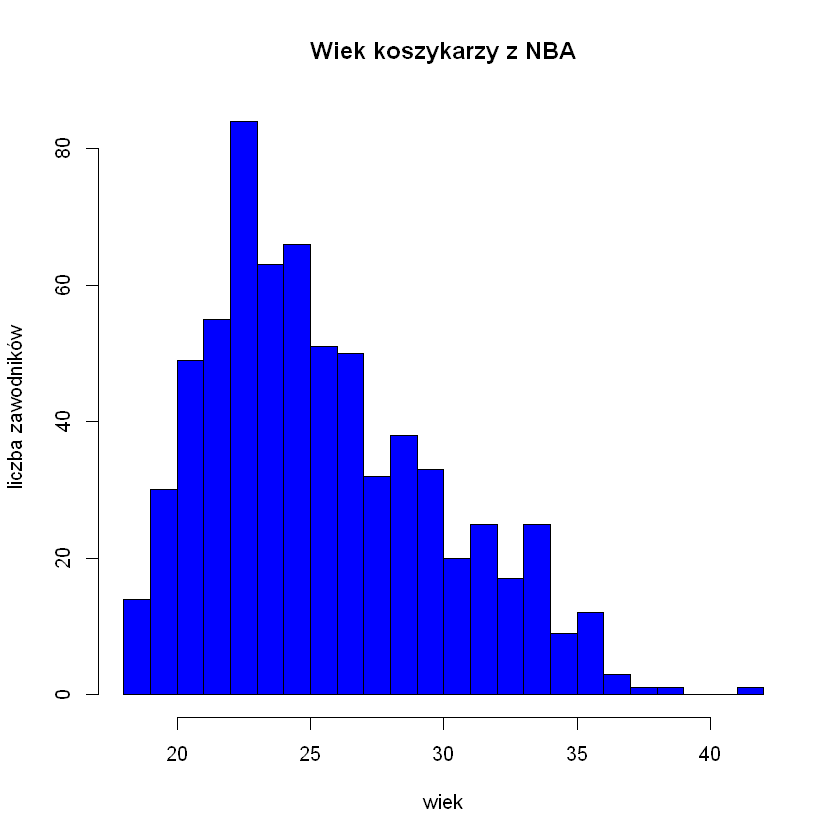

In [12]:
x <- c(18:42)
przedziały <- cut(data$Age,breaks=x)
table(przedziały)
hist(data$Age,breaks=x,main="Wiek koszykarzy z NBA",xlab="wiek",ylab="liczba zawodników",col="blue")
# summary(data$Age)
# boxplot(data$Age)




Analiza wieku

In [13]:
summary(data$Age)

variance <- function(dane){
    avg <- mean(dane)
    diff <- dane-avg
    diff <- diff^2
    x <- sum(diff)
    x <- x/(length(dane)-1)
    return(x) 
   
}

stdev <- function(dane){
    return(sqrt(variance(dane)))
}

skewness <- function(dane){
    avg <- mean(dane)
    diff <- dane-avg
    diff <- diff^3
    x <- sum(diff)
    x <- x/length(dane)
    s <- sd(dane)^3
    x <- x/s
    return(x)
    
}

kurtosis <- function(dane){
    avg <- mean(dane)
    diff <- dane-avg
    diff <- diff^4
    x <- sum(diff)
    x <- x/length(dane)
    s <- sd(dane)^4
    x <- x/s
    return(x)
}

paste("Wariancja",variance(data$Age))
paste("Odchylenie",stdev(data$Age))
paste("Skośność",skewness(data$Age))
paste("Kurtoza",kurtosis(data$Age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   23.00   25.00   26.03   29.00   42.00 

[1] "Wariancja 18.7117616136866"

[1] "Odchylenie 4.32570937693306"

[1] "Skośność 0.651974202884257"

[1] "Kurtoza 2.77385191468206"

Obserwacje i wnioski:<br>
Z obserwacji histogramu wynika, że najwięcej zawodników w lidze jest w przedziale wiekowym 22-27 lat, a pik to 23 lata. Jest to logiczne, gdyż do około 25 roku życia zawodnicy dołączają do ligi (co roku każdy klub pozyskuje kilku takich graczy, tzw. rookies). Później wielu z nich po paru latach odchodzi, gdyż okazali się zbyt słabi, niektórzy muszą odejść z powodu kontuzji. Z kolei po ukończeniu 30 roku życia wielu koszykarzy decyduje się zakończyć karierę, poszukać możliwości zarobku w innych ligach, gdzie bedą mieli status gwiazdy (jak np. Chiny), czy też powrócić do rodzinnych krajów (koszykarze z Europy). Stąd liczba koszykarzy z wiekiem sukcesywnie maleje. Jednak jest to spadek znacznie mniej gwałtowny niż przyrost w grupie wiekowej 20-25 lat. Koszykarze pojawiają się z lidze na przestrzeni paru lat, odchodzą z niej na przestrzeni aż około 15 lat.
Średnia i mediana są zbliżone. Z kolei wariancja i odchylenie standardowe mówi nam, jak mocny jest rozrzut danych. Aż połowa zawodników jest z przedziału wiekowego 23-29 lat, kiedy to wielu koszykarzy zaczyna osiągać swoją szczytową formę.
Jak widać po wartości skośności (powyżej zera), rozkład jest prawostronny. Z kolei kurtoza mniejsza niż 3 mówi nam, że pik histogramu jest niższy niż rozkładu normalnego. Powyższe pomiary dokonano dla populacji, gdyż mamy dostęp do danych wszystkic zawodników ligi.

Analiza skuteczności rzutów z gry

przedziały
   (0,5]   (5,10]  (10,15]  (15,20]  (20,25]  (25,30]  (30,35]  (35,40] 
       0        1        1        6        9        5       23       84 
 (40,45]  (45,50]  (50,55]  (55,60]  (60,65]  (65,70]  (70,75]  (75,80] 
     191      177       68       43       30       13       10        3 
 (80,85]  (85,90]  (90,95] (95,100] 
       1        1        0        4 

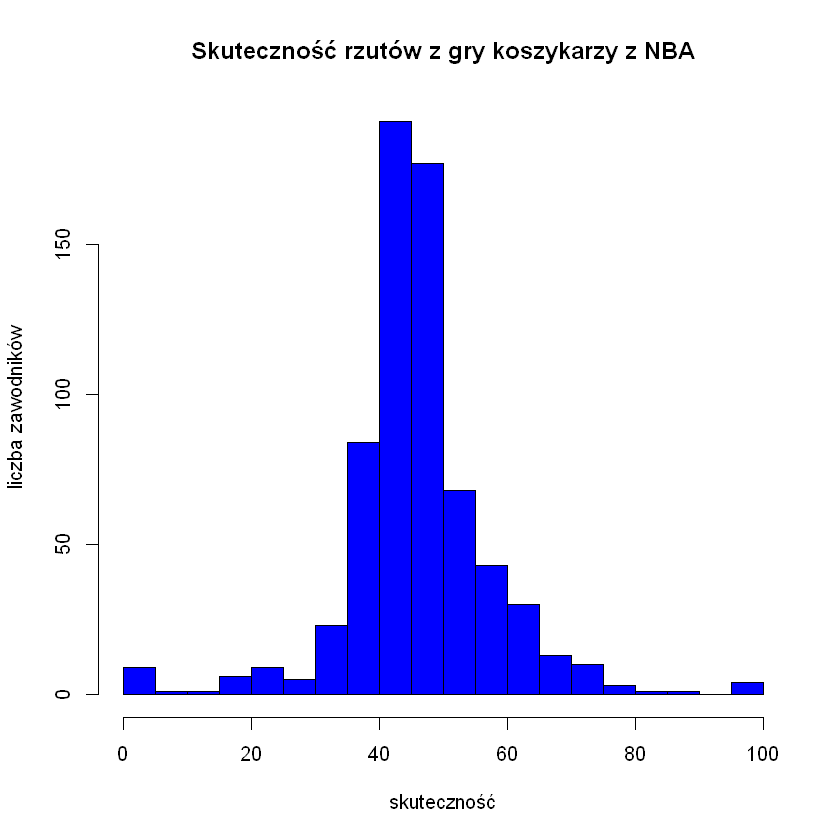

In [14]:
x <- seq(0,100,5)
przedziały <- cut(data$"FG%",breaks=x)
table(przedziały)
hist(data$"FG%",breaks=x,main="Skuteczność rzutów z gry koszykarzy z NBA",xlab="skuteczność",ylab="liczba zawodników",col="blue")


In [15]:
summary(data$"FG%")
paste("Wariancja",variance(data$"FG%"))
paste("Odchylenie",stdev(data$"FG%"))
paste("Skośność",skewness(data$"FG%"))
paste("Kurtoza",kurtosis(data$"FG%"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   41.50   45.40   46.22   50.50  100.00 

[1] "Wariancja 136.14797185693"

[1] "Odchylenie 11.6682463059763"

[1] "Skośność 0.0114149592722601"

[1] "Kurtoza 8.2977250904124"

Jak widzimy na powyższym histogramie, rozkład skuteczności rzutów z gry jest zbliżony do rozkładu normalnego. Średnia i mediana są bardzo zbliżone do siebie, rozkład jest praktycznie symetryczny o czym świadczy skośność bliska zeru. Kurtoza wynosząca ponad 8 sugeruje nam, że pik histogramu jest wyższy niż w rozkładzie normalnym. Aż 50% zawodników notuje skuteczność z zakresu 41-50%, co jest naprawdę bliskie wartości średniej i mediany. Odchylenie standardowe to niecałe 12%, czyli większość zawodników notuje skuteczność różniącą się o maksymalnie tyle od średniej. Poza tym mamy oczywiście wyniki znacznie przekraczające wartość średniej. Co ciekawe, są wśród nich nie tylko największe gwiazdy ligi, ale też zawodnicy, którzy grają na pozycjach podkoszowych w mniej znacznych rolach. Jest tak dlatego, że rzuty z okolicy kosza, czyli małej odlgłości są łatwiejsze do trafienia, niż te z większego dystansu. Niestety w przypadku tych danych mamy również do czynienia z tzw. outliers, czyli wynikami, które trochę fałszują wyniki statystyk. Są to zawodnicy, którzy na przykład zagrali tylko w jednym meczu w sezonie przez kilka minut i oddali jeden celny rzut do kosza. Ich średnia skuteczność w sezonie wynosi 100%, lecz nie jest to wynik, który można jakkolwiek porównywać z innymi zawodnikami. Podobnie można znaleźć graczy, którzy notują średnią skuteczność 0%. Można ich zauważyć na histogramie. Z tego też powodu aby liczyć się w walce o nagrody indywidualne w NBA, należy rozegrać co najminej 58 (spośród 82) meczów. Wtedy wyniki można uznać za miarodajne

### Test statystyczny
Aby przeprowadzić test wybierzemy losowo 100 zawodników z pozyższej bazy danych. Zauważyliśmy już wcześniej że rozkład skteczności rzutów z gry jest zbliżony do normalnego. Skoro liczba zawodników będzie większa niż 30 wykonany test Z. <br>
Hipoteza zerowa: średnia skuteczność rzutów z gry w lidze jest równa 50%<br>
Hipoteza alternatywna: średnia skuteczność rzutów z gry w lidze jest mniejsza niż 50%<br>
Wykonam test jednostronny

In [21]:
# przyjęty poziom istotności
alpha <- 0.05
# wartość krytyczna
krytyczna <- qnorm(alpha)
paste("wartość krytyczna: ", krytyczna)
# losujemy 100 zawodników
losowi <- data[sample(nrow(data), 100), ]
statystyka <- (mean(losowi$"FG%")-50)/(sd(losowi$"FG%")/sqrt(100))
paste("wartość statystyki: ",statystyka)

[1] "wartość krytyczna:  -1.64485362695147"

[1] "wartość statystyki:  -1.75647142212519"

Dla wylosowanych przeze mnie danych wartość statystyki wyniosła -1.75, kiedy wartość krytyczna to -1.64 przy poziomie istotności 5% dla testu jednostronnego (w tym przypadku lewostronny). Jako, że wartośc statystyki jest mniejsza niż wartość krytyczna, a jest to test lewostronny, należy odrzucić hipotezę zerową i przyjąć alternatywną. Analizując dane dla populacji można dojść do wniosku, że nie popełniono tutaj błędu (odrzucono błędną hipotezę, co jest poprawne).<br>
Wniosek: średnia skuteczność rzutów z gry w NBA wynosi mniej niż 50%

### Podsumowanie
Uważam, że powyższe dane są bardzo interesujące i można wiele z nich odczytać. Nie bez powodu wielu trenerów też tak uważa. Obecnie w erze big data również w sporcie widzimy, że prowadzone są przeróżne statystyki. Dla osób zajmujących się wyszukiwaniem potencjalnych nowych zawodników często służą one pomocą w wyselekcjonowaniu najciekawszych kandydatów. Z kolei dla kibiców i dziennikarzy stanowią pomoc w lepszym zrozumieniu meczów. W przyszłości danych do analizy będzie prawdopodobnie tylko więcej ze względu na rozwój technologii. <br>
Jeśli chodzi o propozycje kolejnych badań, w przyszłości można by zbadać skuteczność bardziej szczegółowo, np. analizując osobno rzuty za 2 i 3 punkty. Dobrym pomysłem wydaje się również zbadanie korelacji między chociażby średnią liczbą minut, a zdobytych punktów.